In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from preprocessing import process_data, get_recreational_error


In [3]:
data = pd.read_csv('data/datathon_data.csv')
data_transformed, label = process_data(data)
data_transformed.shape


(533009, 384)

In [4]:
reconstruction_loss_transaction_all = pd.read_csv("./results/reconstruction_loss_transaction.csv")
    # Compute the threshold at the percentile
quantile_border = 0.99981
threshold = np.quantile(reconstruction_loss_transaction_all, quantile_border)
threshold

0.00875176585942327

In [5]:
predicts = get_recreational_error(data_transformed)

[LOG 20250308-10:34:35] collected individual reconstruction loss of: 000000/533009 transactions
[LOG 20250308-10:34:41] collected individual reconstruction loss of: 100000/533009 transactions
[LOG 20250308-10:34:46] collected individual reconstruction loss of: 200000/533009 transactions
[LOG 20250308-10:34:51] collected individual reconstruction loss of: 300000/533009 transactions
[LOG 20250308-10:34:57] collected individual reconstruction loss of: 400000/533009 transactions
[LOG 20250308-10:35:02] collected individual reconstruction loss of: 500000/533009 transactions


In [13]:
test = data_transformed.copy()
test['predict'] = predicts
test['predict'].sort_values(ascending=False).head(10)

506926    0.423627
372775    0.360063
71036     0.345681
199041    0.333040
502255    0.330553
91688     0.313124
318426    0.304942
107062    0.300421
172868    0.298144
215582    0.297903
Name: predict, dtype: float64

In [14]:
anomaly_flags = predicts > threshold

In [15]:
confusion_matrix(anomaly_flags, label)

array([[532906,      1],
       [     3,     99]], dtype=int64)

In [16]:
data[anomaly_flags != label]

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
12939,12939,C1,C20,C1,C18,A1,B1,9.106583e+05,5.444984e+04,anomal
137524,137524,C5,C51,C2,C21,A3,B3,1.000000e+07,1.191296e+07,regular
198291,198291,C5,C58,C2,C21,A3,B3,4.130372e+06,4.130372e+06,regular
389193,389193,C4,C48,C2,C28,A2,B3,1.000000e+07,1.974904e+07,regular


In [8]:
errors = get_recreational_error(process_data(data.iloc[528759], return_label=False))
errors > threshold

[LOG 20250308-04:08:23] collected individual reconstruction loss of: 000000/000001 transactions


array([ True])

'## Explain


### Integrated Gradients

In [6]:
from explainable.integrated_gradients import integrated_gradients, autoencoder_model, get_top_attributions

In [9]:


attributions = integrated_gradients(autoencoder_model, data_transformed.iloc[528759], steps=50)
top_features = pd.DataFrame(get_top_attributions(attributions, 10))
top_features['index'] = data_transformed.columns[top_features.index]
top_features.columns = ['attribution', 'index']

print("Top 10 contributing features with their attribution values:")
top_features



Top 10 contributing features with their attribution values:


,attribution,index
77,0.000190,KTOSL_Z17
334,0.000141,HKONT_J62
382,0.000080,DMBTR
286,0.000059,BSCHL_Q50
383,0.000053,WRBTR
189,0.000045,PRCTR_J68
4,0.000000,KTOSL_C1
131,0.000000,PRCTR_C58
122,0.000000,PRCTR_C49
123,0.000000,PRCTR_C50


### Lime


C:\Users\flori\anaconda3\envs\torch_test\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\flori\anaconda3\envs\torch_test\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\flori\anaconda3\envs\torch_test\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Data

[LOG 20250308-04:08:27] collected individual reconstruction loss of: 000000/005000 transactions


C:\Users\flori\anaconda3\envs\torch_test\Lib\site-packages\lime\lime_tabular.py:413: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = int(data_row[i])
C:\Users\flori\anaconda3\envs\torch_test\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\flori\anaconda3\envs\torch_test\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by po

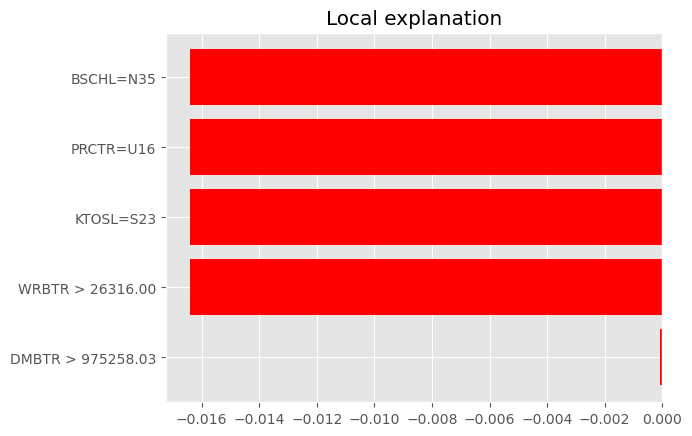

In [11]:
from explainable.lime import get_explainer
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
data = pd.read_csv('data/datathon_data.csv')
# Generate explanation
explanation = get_explainer(data.iloc[102552])

# Visualize the explanation in the notebook
with plt.style.context("ggplot"):
    explanation.as_pyplot_figure()
    plt.show()

[LOG 20250308-04:08:52] collected individual reconstruction loss of: 000000/005000 transactions


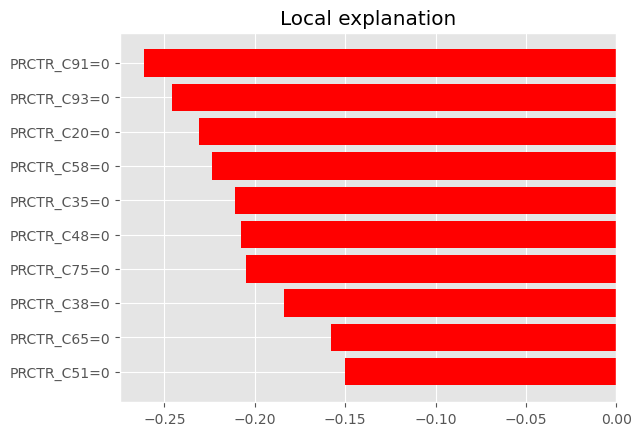

In [12]:
from explainable.lime_non_cat import get_explainer
from preprocessing import process_data
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import pandas as pd
data = pd.read_csv('data/datathon_data.csv')
# Generate explanation
sample = process_data(data.iloc[102552], return_label=False)
explanation = get_explainer(sample)

# Visualize the explanation in the notebook
with plt.style.context("ggplot"):
    explanation.as_pyplot_figure()
    plt.show()

### Shap Values

In [1]:
import pandas as pd
data = pd.read_csv('data/datathon_data.csv')
from explainable.shappy import get_shap_explainer, get_shap_explainer_non_cat
from preprocessing import process_data, get_recreational_error
#sample = process_data(data.iloc[102552], return_label=False)
#shap_values = get_shap_explainer(sample)
sample_non_cut = data.iloc[102552]
shap_values_non_cat = get_shap_explainer_non_cat(sample_non_cut)

C:\Users\flori\anaconda3\envs\torch_test\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\flori\anaconda3\envs\torch_test\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\flori\anaconda3\envs\torch_test\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\flori\anaconda3\envs\torch_test\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\flori\anaconda3\envs\torch_test\Lib\subpr

[LOG 20250308-13:19:58] collected individual reconstruction loss of: 000000/000010 transactions
[LOG 20250308-13:19:58] collected individual reconstruction loss of: 000000/000001 transactions
[LOG 20250308-13:19:59] collected individual reconstruction loss of: 000000/005100 transactions


In [2]:
shap_values_non_cat
pd.Series(shap_values_non_cat, index=data.columns).sort_values(key = lambda x: x.abs(), ascending=False)


HKONT    2.417176e-02
KTOSL   -2.275981e-02
PRCTR   -1.783927e-02
BSCHL   -7.270896e-03
WRBTR   -9.466978e-04
DMBTR   -1.358147e-04
BUKRS    1.490116e-08
WAERS    1.490116e-08
BELNR    1.490116e-08
label    0.000000e+00
dtype: float64

In [14]:
from preprocessing import process_data, get_recreational_error
shap_values
t = shap_values.T
t = pd.DataFrame(t)
print(t.shape)
t.index = process_data(data, return_label=False).columns
print(t.sort_values(0, ascending=False).head(10))
print(sum(t[0]))
print(get_recreational_error(sample))


(384, 1)
                  0
BSCHL_N35  0.051520
KTOSL_S23  0.051497
HKONT_C42  0.050713
PRCTR_U16  0.050485
HKONT_B1   0.031412
HKONT_B2   0.005090
BSCHL_D53  0.000000
BSCHL_H00  0.000000
BSCHL_B43  0.000000
BSCHL_C31  0.000000
BSCHL_C62  0.000000
BSCHL_I26  0.000000
BSCHL_I05  0.000000
BSCHL_H17  0.000000
BSCHL_H15  0.000000
BSCHL_F99  0.000000
BSCHL_E99  0.000000
BSCHL_F93  0.000000
BSCHL_F67  0.000000
BSCHL_I57  0.000000
BSCHL_D16  0.000000
BSCHL_F26  0.000000
BSCHL_F24  0.000000
BSCHL_F04  0.000000
BSCHL_I53  0.000000
KTOSL_A19  0.000000
BSCHL_I81  0.000000
BSCHL_M83  0.000000
BSCHL_O91  0.000000
BSCHL_O49  0.000000
BSCHL_O46  0.000000
BSCHL_O26  0.000000
BSCHL_O19  0.000000
BSCHL_N82  0.000000
BSCHL_N67  0.000000
BSCHL_N56  0.000000
BSCHL_N50  0.000000
BSCHL_M65  0.000000
BSCHL_B31  0.000000
BSCHL_M24  0.000000
BSCHL_L72  0.000000
BSCHL_L36  0.000000
BSCHL_L29  0.000000
BSCHL_L19  0.000000
BSCHL_K79  0.000000
BSCHL_K43  0.000000
BSCHL_J72  0.000000
BSCHL_J21  0.000000
BSCHL_B38  

## Decision tree

In [11]:
print(label.value_counts())

label
False    532909
True        100
Name: count, dtype: int64


In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0, min_samples_leaf=10)
tree.fit(data_transformed, label)

confusion_matrix(tree.predict(data_transformed), label)


array([[532908,      0],
       [     1,    100]])

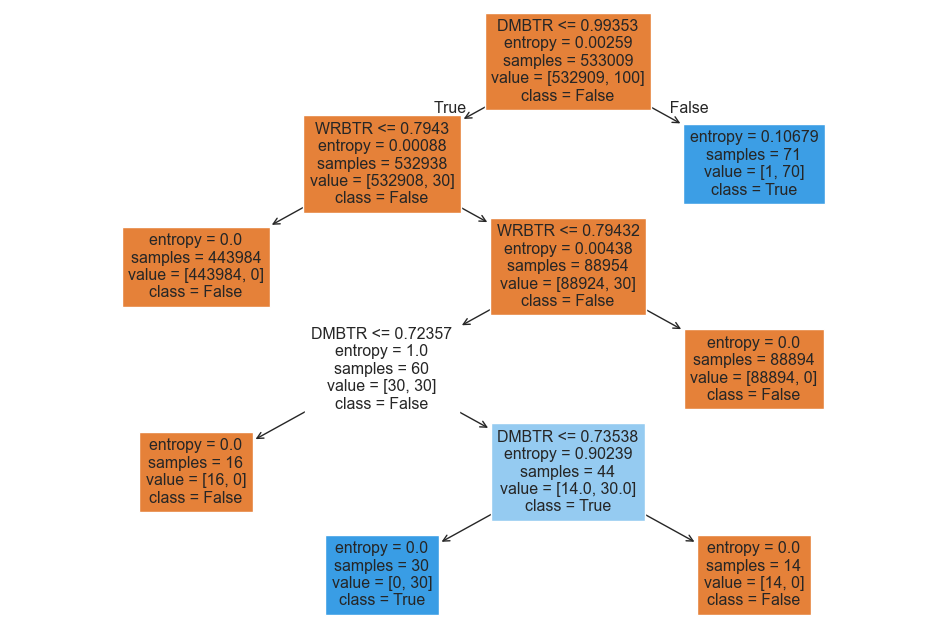

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=data_transformed.columns, class_names=["False", "True"], filled=True, precision=5)
plt.show()

In [16]:
data_transformed[label].index

Index([ 12939,  32317,  33365,  34058,  34059,  35691,  35944,  41925,  43399,
        52048,  71036,  88224,  90831,  91688,  93972,  97954, 102552, 107062,
       113179, 119338, 131910, 144286, 170320, 172868, 179462, 182606, 183064,
       198583, 199041, 213105, 215582, 220927, 229634, 230216, 230755, 234335,
       234460, 246305, 246409, 246501, 251260, 261308, 281049, 281275, 300115,
       303744, 306535, 306995, 315589, 316053, 318426, 318771, 326531, 336799,
       341778, 348343, 352339, 359776, 359909, 360246, 364695, 365262, 365737,
       370090, 370360, 372775, 378649, 382827, 386827, 387059, 387184, 391298,
       397217, 401639, 405600, 406420, 415781, 418854, 421175, 423136, 429599,
       431719, 435165, 438816, 445338, 461429, 462643, 463973, 466915, 468803,
       484997, 487511, 498175, 502056, 502255, 506926, 507636, 528449, 528759,
       532375],
      dtype='int64')

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression


# Train Logistic Regression with class balancing
reg = LogisticRegression(max_iter=10000, random_state=0, C=3, class_weight={0: 1, 1: 100})
reg.fit(data_transformed, label)

# Evaluate performance
confusion_matrix(reg.predict(data_transformed), label)

array([[532909,      1],
       [     0,     99]])

In [38]:
pd.DataFrame(reg.coef_, columns=data_transformed.columns).T.abs().sort_values(0, ascending=False).head(20)

,0
WRBTR,18.099970
BSCHL_A2,15.735967
BSCHL_A3,15.697796
HKONT_B2,14.391298
HKONT_B3,13.959202
HKONT_B1,10.944753
DMBTR,9.747270
PRCTR_C11,7.939198
PRCTR_C19,7.934008
PRCTR_C13,7.900020


In [10]:
data.iloc[131910]

BELNR           131910
WAERS              O43
BUKRS              R07
KTOSL              N80
PRCTR              J39
BSCHL              T90
HKONT              V92
DMBTR    92445518.2981
WRBTR    59585041.1988
label           anomal
Name: 131910, dtype: object